In [297]:
import pandas as pd
import numpy as np
import seaborn as sns

In [298]:
import matplotlib.pyplot as plt

In [299]:
df = pd.read_csv('Social_Network_Ads.csv')

In [300]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [301]:
df = df.iloc[:,2:]

In [302]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [303]:
from sklearn.model_selection import train_test_split

In [304]:
x_train, x_test , y_train, y_test = train_test_split(df.drop('Purchased', axis = 1), df['Purchased'], test_size = 0.3, random_state = 0 )

In [305]:
x_train.shape

(280, 2)

In [306]:
 x_test.shape

(120, 2)

In [307]:
from sklearn.preprocessing import StandardScaler

In [308]:
scaler = StandardScaler()

#### fit the scaler to the train set it will learn the paramters 

In [309]:
scaler.fit(x_train)

# transofrm train and test sets 
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [310]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

#### ye whin istemal kr rhe hen formula jo hmne prha he
####  xi - |x| / sigma
#### we learn from training data but transform both test and train 

In [311]:
# after scaling we get a numpy array but we want to have a dataframe
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [312]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [313]:
x_train_scaled.sample(5)
x_test_scaled.sample(4)

,Age,EstimatedSalary
111,-0.280814,-0.572804
110,-0.280814,-1.295780
97,0.993704,-1.064427
66,-1.359252,0.555039


In [314]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [315]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [316]:
# great we got what we wanted


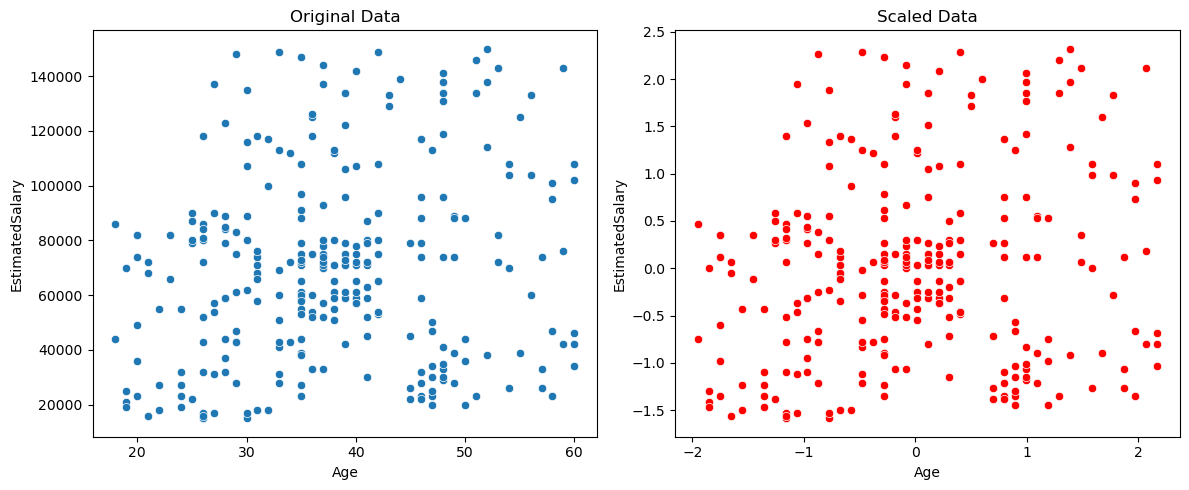

In [317]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
sns.scatterplot(
    x=x_train['Age'],
    y=x_train['EstimatedSalary'],
    ax=ax1
)
ax1.set_title("Original Data")
sns.scatterplot(
    x=x_train_scaled['Age'],
    y=x_train_scaled['EstimatedSalary'],
    ax=ax2,
    color = 'red'
)
ax2.set_title("Scaled Data")

plt.tight_layout()
plt.show()


### shape of the data is exactly the same but we have scaled them down and mean became 0 and standard daviation was restricted

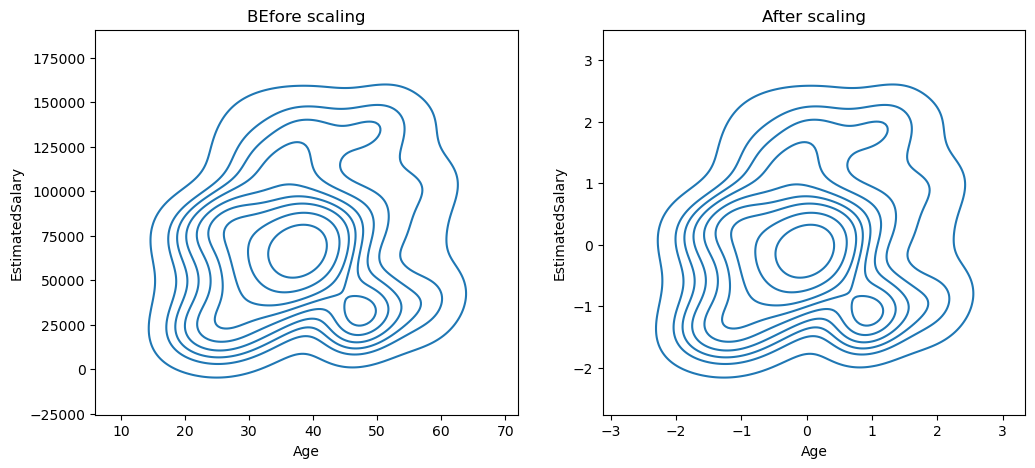

In [318]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("BEfore scaling")
sns.kdeplot(x=x_train['Age'], y = x_train['EstimatedSalary'], ax = ax1)

ax2.set_title("After scaling")
sns.kdeplot(x=x_train_scaled['Age'], y = x_train_scaled['EstimatedSalary'], ax = ax2)

plt.show()

##### You didn’t do “KDE twice on the same axis” wrong — you actually changed the *type* of KDE. 
##### What the other guy did was **1D KDEs** (kdeplot(Age) and kdeplot(Salary) overlaid on ONE axis → two separate marginal distributions).
##### What YOU did is a **2D joint KDE** (kdeplot(x=Age, y=Salary)) which estimates a *bivariate probability density surface*.
##### With your data, Age and EstimatedSalary live on very different scales, so the 2D KDE before scaling is dominated by Salary,
##### and after StandardScaler the bandwidth becomes inappropriate, collapsing the density. 
##### So nothing is “buggy”: you unintentionally switched from 1D KDEs to a 2D joint KDE, which behaves very differently and is scale-sensitive.

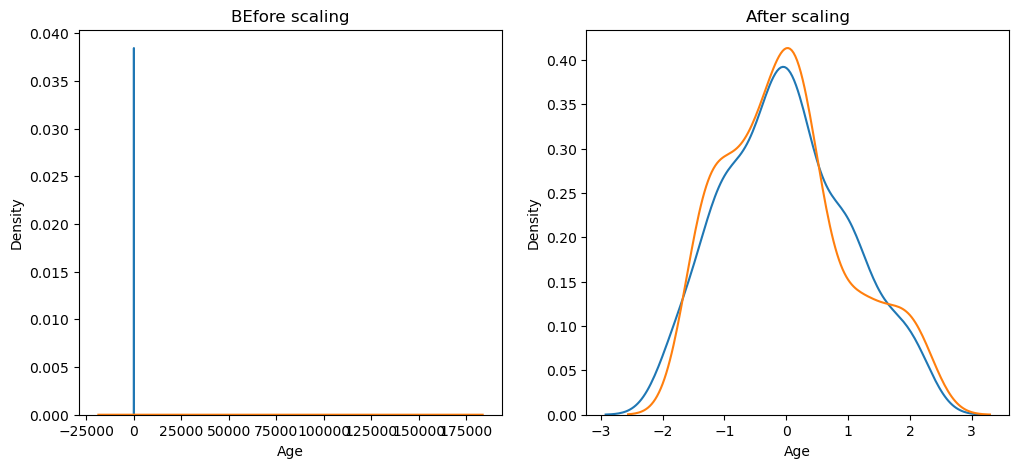

In [319]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("BEfore scaling")
sns.kdeplot(x_train['Age'], ax = ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax = ax1)
ax2.set_title("After scaling")
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot( x_train_scaled['EstimatedSalary'], ax = ax2)

plt.show()

### Why scaling is Important


In [320]:
from sklearn.linear_model import LogisticRegression

In [321]:
lr = LogisticRegression()

In [322]:
lr_Scaled  = LogisticRegression()

In [323]:
lr.fit(x_train,y_train)
lr_Scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [324]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_Scaled.predict(x_test_scaled)

In [325]:
from sklearn.metrics import accuracy_score

In [326]:
accuracy_score(y_test, y_pred)

0.875

In [327]:
accuracy_score(y_test, y_pred_scaled)

0.8666666666666667

In [328]:
y_pred_scaled

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

## Decission Tree

In [329]:
# we can leave that for now check other file for this


### Effect of Outliers

In [330]:
a = pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})
df = pd.concat([df, a], ignore_index = True) 

In [331]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

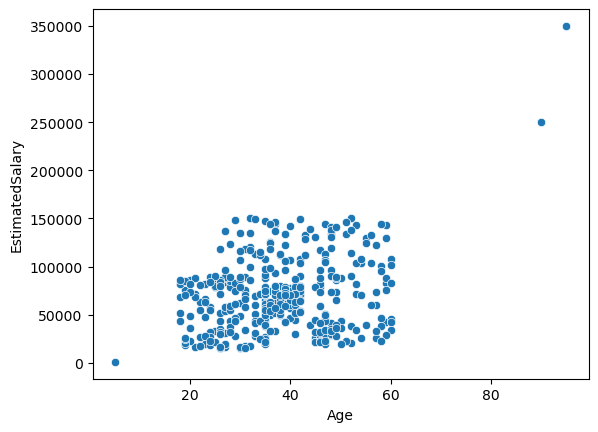

In [334]:
sns.scatterplot(x=df['Age'], y = df['EstimatedSalary'])

##### We need to handle outliers even in standardization this process will not remove outliers

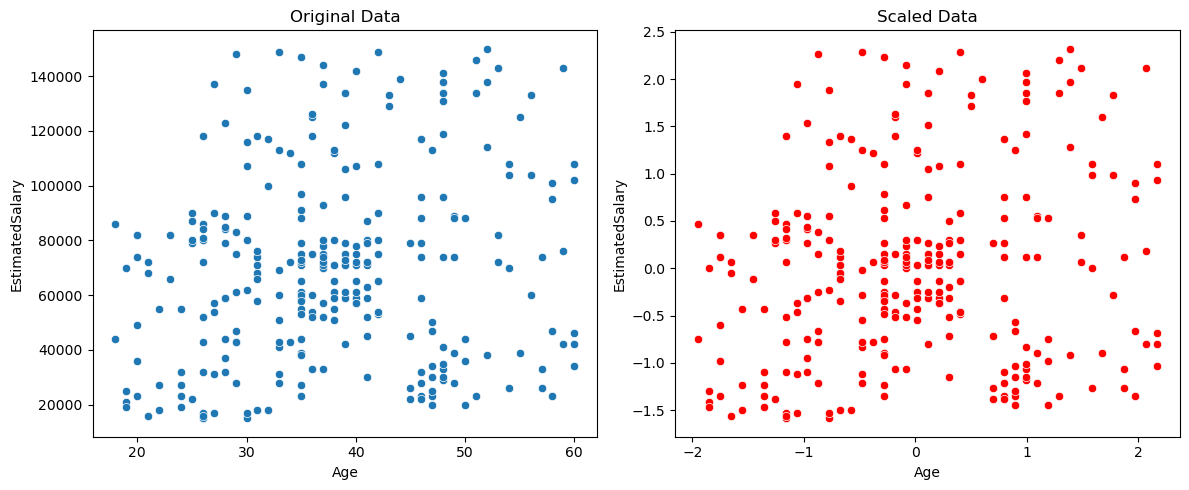

In [336]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [337]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [338]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

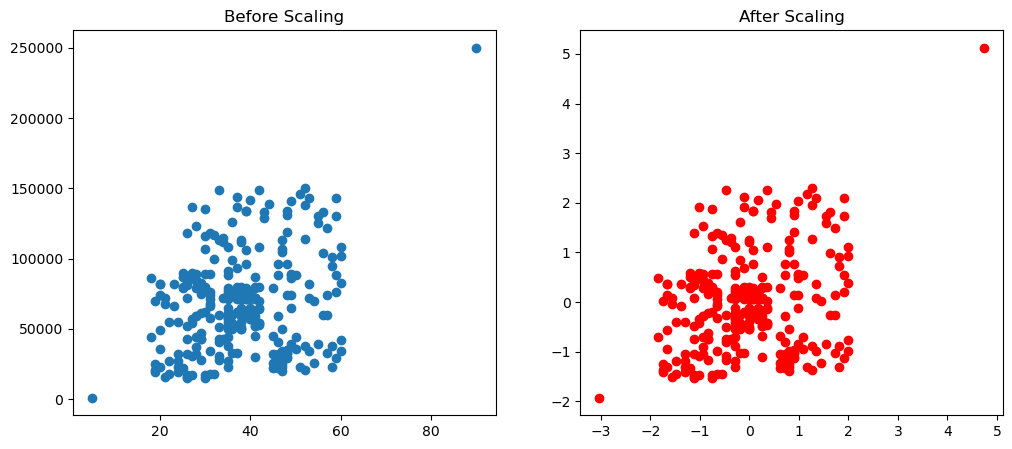

In [340]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

#  as we can clearly see outliers still remains

In [342]:
lr.fit(X_train,y_train)
lr_Scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [343]:
accuracy_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [121, 120]